## 3.2 Assignment: Using Data to Improve MLB Attendance

### Step 1: Import the data and libraries

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data to dataframe
df = pd.read_csv(r'C:/Users/jeric/OneDrive/Documents/classFiles/DSC630_AD/data/dodgers-2022.csv', index_col=False)

#View Data
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Step 2: Clean up the data

In [470]:
# Add categorical order to dataframe day of week & month fields

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

df['month'] = pd.Categorical(df['month'], categories=
    ['APR','MAY','JUN','JUL','AUG','SEP','OCT'],
    ordered=True)

In [471]:
# Create a numeric version of month field - for correlation analysis
df['month_num'] = df['month'].replace({'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10})
df['month_num'].value_counts()

5     18
8     15
4     12
7     12
9     12
6      9
10     3
Name: month_num, dtype: int64

In [472]:
# Create a numeric version of weekday field - for correlation analysis
df['day_of_week_num'] = df['day_of_week'].replace({'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7})
df['day_of_week_num'].value_counts()

1    13
3    13
6    13
7    13
2    12
4    12
5     5
Name: day_of_week_num, dtype: int64

In [473]:
# Create a numeric version of day/night field - for correlation analysis
df['day_night_num'] = df['day_night'].replace({'Day':1,'Night':2})
df['day_night_num'].value_counts()

2    66
1    15
Name: day_night_num, dtype: int64

In [474]:
# Create a numeric version of sky type field - for correlation analysis
df['skies_num'] = df['skies'].replace({'Clear':1,'Clear ':1,'Cloudy':2})
df['skies_num'].value_counts()

1    62
2    19
Name: skies_num, dtype: int64

In [475]:
# Create a numeric version of cap offered field - for correlation analysis
df['cap_num'] = df['cap'].replace({'NO':0,'YES':1})
df['cap_num'].value_counts()

0    79
1     2
Name: cap_num, dtype: int64

In [476]:
# Create a numeric version of shirt offered field - for correlation analysis
df['shirt_num'] = df['shirt'].replace({'NO':0,'YES':1})
df['shirt_num'].value_counts()

0    78
1     3
Name: shirt_num, dtype: int64

In [477]:
# Create a numeric version of fireworks field - for correlation analysis
df['fireworks_num'] = df['fireworks'].replace({'NO':0,'YES':1})
df['fireworks_num'].value_counts()

0    67
1    14
Name: fireworks_num, dtype: int64

In [478]:
# Create a numeric version of bobblehead offered field - for correlation analysis
df['bobblehead_num'] = df['bobblehead'].replace({'NO':0,'YES':1})
df['bobblehead_num'].value_counts()

0    70
1    11
Name: bobblehead_num, dtype: int64

In [479]:
# Create a numeric version of opponent field - for correlation analysis
opponents_dict ={
'Angels':1,
'Astros':2,
'Braves':3,
'Brewers':4,
'Cardinals':5,
'Cubs':6,
'Giants':7,
'Marlins':8,
'Mets':9,
'Nationals':10,
'Padres':11,
'Phillies':12,
'Pirates':13,
'Reds':14,
'Rockies':15,
'Snakes':16,
'White Sox':17
}

df['opponent_num'] = df['opponent'].replace(opponents_dict)
df['opponent_num'].value_counts()

11    9
16    9
15    9
7     9
5     7
9     4
4     4
14    3
13    3
12    3
1     3
10    3
2     3
8     3
6     3
3     3
17    3
Name: opponent_num, dtype: int64

### Step 3: View Correlation Matrix

<AxesSubplot:>

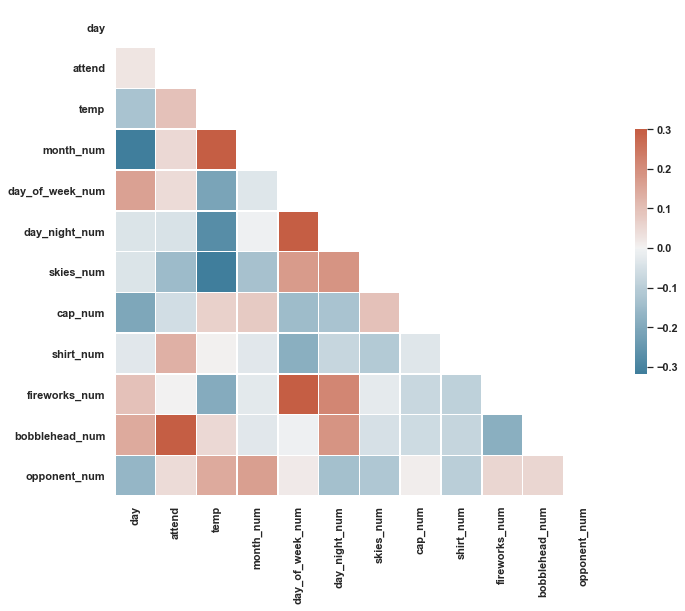

In [480]:

sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation Chart Notes:
 - Bobblehead is strongly correlated to attendance
 - Shirt_num is somewhat correlated to attendance
 - Skies is slightly correlated to attendance

## Step 4: View Unique values in each column

This step is done to get familiar with the data and to identify any data issues

Text(0.5, 1.0, 'Month Record Counts')

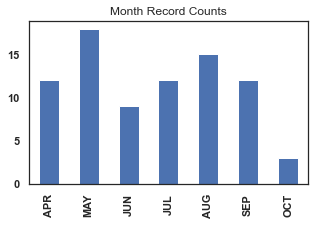

In [373]:
plt.figure(figsize=(5, 3))
df['month'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Month Record Counts")

In [435]:
## How many days are present in October?
oct_df = df.loc[df['month']=='OCT']
oct_df['day'].value_counts()

1    1
2    1
3    1
Name: day, dtype: int64

Text(0.5, 1.0, 'Day Record Counts')

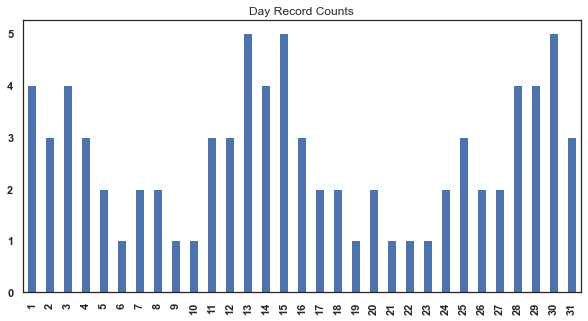

In [436]:
plt.figure(figsize=(10,5))
df['day'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Day Record Counts")

Text(0.5, 1.0, 'Day of Week Record Counts')

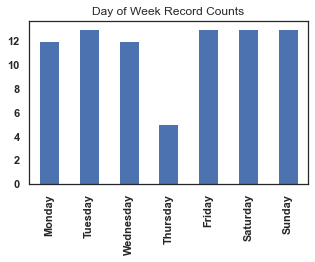

In [437]:
plt.figure(figsize=(5, 3))
df['day_of_week'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Day of Week Record Counts")

Text(0.5, 1.0, 'Opponent Record Counts')

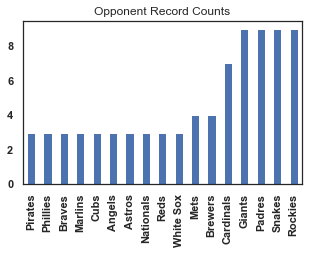

In [380]:
plt.figure(figsize=(5, 3))
df['opponent'].value_counts().sort_values().plot(kind='bar')
plt.title("Opponent Record Counts")

Text(0.5, 1.0, 'Sky Type Record Counts')

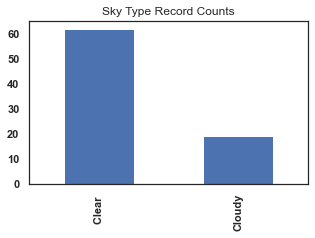

In [381]:
plt.figure(figsize=(5, 3))
df['skies'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Sky Type Record Counts")

Text(0.5, 1.0, 'Day or Night Record Counts')

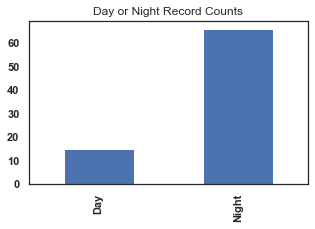

In [382]:
plt.figure(figsize=(5, 3))
df['day_night'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Day or Night Record Counts")

Text(0.5, 1.0, 'Cap Record Counts')

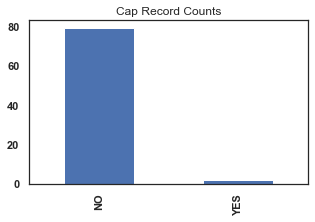

In [383]:
plt.figure(figsize=(5, 3))
df['cap'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Cap Record Counts")

Text(0.5, 1.0, 'Shirt Record Counts')

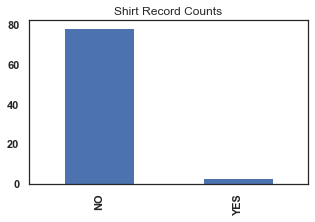

In [384]:
plt.figure(figsize=(5, 3))
df['shirt'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Shirt Record Counts")

Text(0.5, 1.0, 'Fireworks Record Counts')

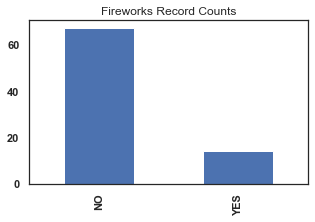

In [385]:
plt.figure(figsize=(5, 3))
df['fireworks'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Fireworks Record Counts")

Text(0.5, 1.0, 'Bobblehead Record Counts')

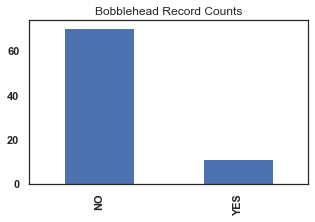

In [386]:
plt.figure(figsize=(5, 3))
df['bobblehead'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Bobblehead Record Counts")

### Step 5: View Distribution of total attendance by each dimension

Text(0.5, 1.0, 'Mean Attendance by Month')

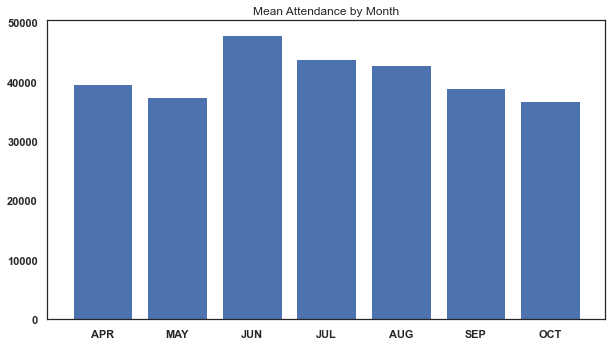

In [482]:
df_month_agg = df.groupby(['month']).mean().reset_index()

plt.bar(df_month_agg['month'], df_month_agg['attend'])
plt.title("Mean Attendance by Month")

#### Mean Attendance by Month Chart Notes: 
Attendance was low in April and May, started trending down again June forward

Text(0.5, 1.0, 'Mean Attendance by Weekday')

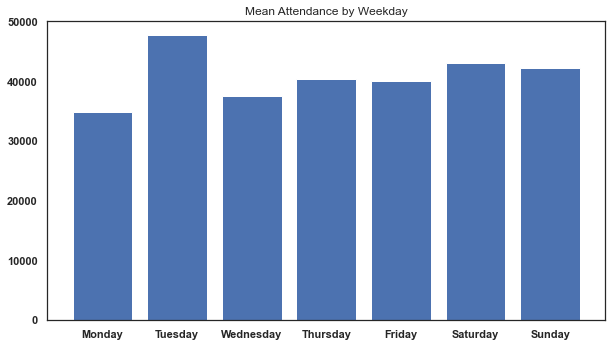

In [483]:
df_weekday_agg = df.groupby(['day_of_week']).mean().reset_index()
df_weekday_agg.head()

plt.bar(df_weekday_agg['day_of_week'], df_weekday_agg['attend'])
plt.title("Mean Attendance by Weekday")


#### Mean Attendance by Weekday Notes:
Attendance is lowest on Mondays, highest on Tuesdays

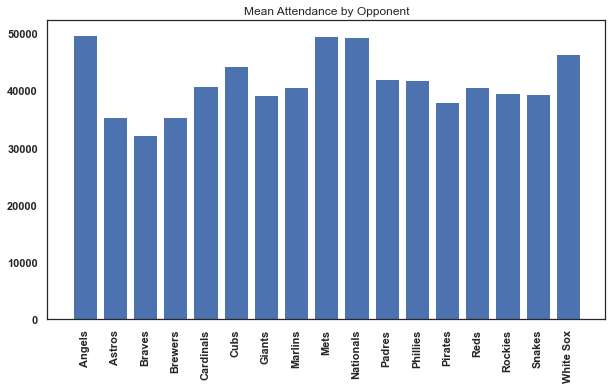

In [484]:
df_opponent_agg = df.groupby(['opponent']).mean().reset_index()
plt.bar(df_opponent_agg['opponent'], df_opponent_agg['attend'])
plt.title("Mean Attendance by Opponent")
plt.xticks(rotation=90)
plt.show()

#### Mean Attendancy by Opponent Chart Notes:
Attendance is lowest when the opponent is the Braves

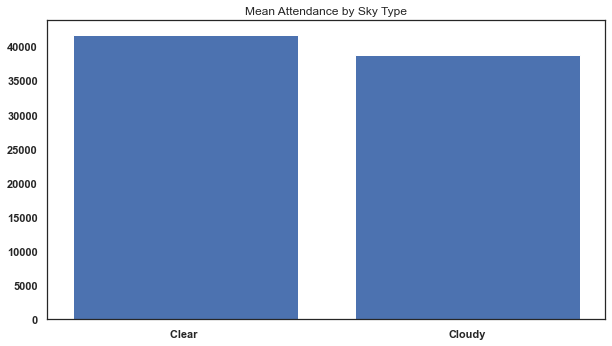

In [485]:
df_skies_agg = df.groupby(['skies']).mean().reset_index()
df_skies_agg.head()

plt.bar(df_skies_agg['skies'], df_skies_agg['attend'])
plt.title("Mean Attendance by Sky Type")
plt.show()

#### Mean Attendance by Sky Type Notes:
Attendance is only slightly lower than when skies are clear

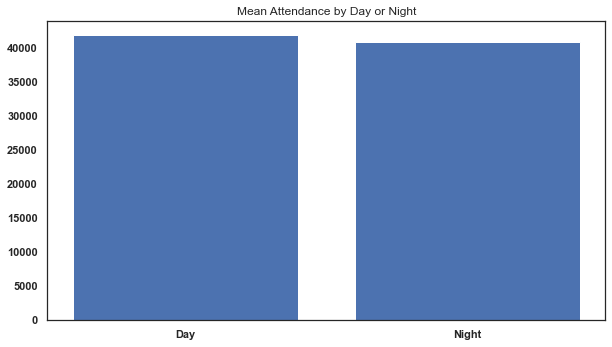

In [486]:
df_day_night_agg = df.groupby(['day_night']).mean().reset_index()
df_day_night_agg.head()

plt.bar(df_day_night_agg['day_night'], df_day_night_agg['attend'])
plt.title("Mean Attendance by Day or Night")
plt.show()

#### Mean Attendancy by Day or Night Chart Notes
Attendance is similar for day and night games

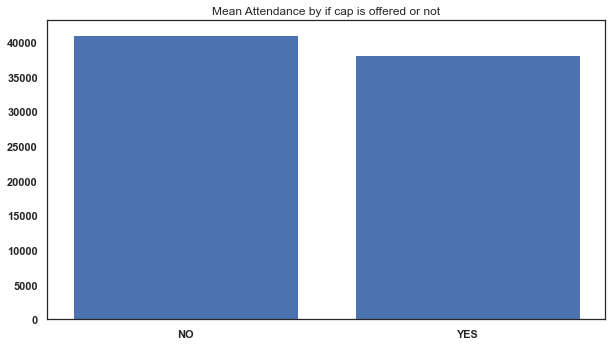

In [487]:
df_cap_agg = df.groupby(['cap']).mean().reset_index()
df_cap_agg.head()

plt.bar(df_cap_agg['cap'], df_cap_agg['attend'])
plt.title("Mean Attendance by if cap is offered or not")
plt.show()

#### Mean Attendance by if Cap if Offered Chart Notes:
Attendance is slightly lower on a monthly average when a cap is offered

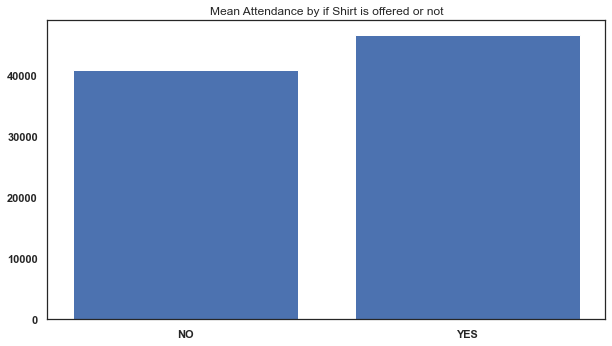

In [488]:
df_shirt_agg = df.groupby(['shirt']).mean().reset_index()
df_shirt_agg.head()

plt.bar(df_shirt_agg['shirt'], df_shirt_agg['attend'])
plt.title("Mean Attendance by if Shirt is offered or not")
plt.show()

#### Mean Attendance by if Shirt is Offered Notes:
Mean Monthly attendance is higher when a shirt is offered

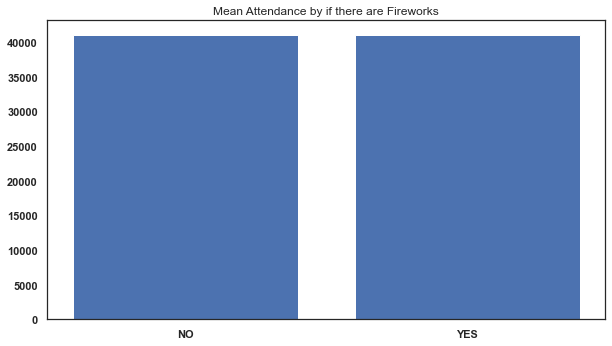

In [489]:
df_fw_agg = df.groupby(['fireworks']).mean().reset_index()
df_fw_agg.head()

plt.bar(df_fw_agg['fireworks'], df_fw_agg['attend'])
plt.title("Mean Attendance by if there are Fireworks")
plt.show()

#### Mean Attendance if there are fireworks notes:
Monthly mean attendance is similar whether there are fireworks or not

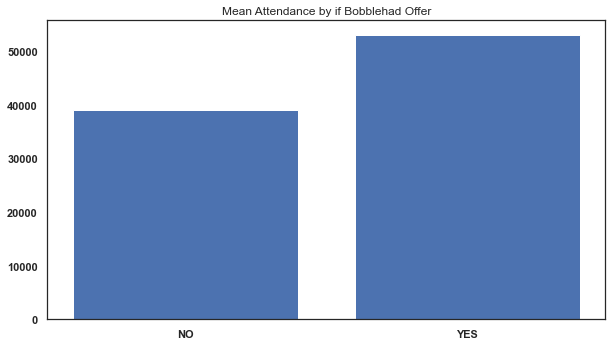

In [490]:
df_bh_agg = df.groupby(['bobblehead']).mean().reset_index()
df_bh_agg.head()

plt.bar(df_bh_agg['bobblehead'], df_bh_agg['attend'])
plt.title("Mean Attendance by if Bobblehad Offer")
plt.show()

### Step 6: Inestigate bobblehead offer, shirt offer, and skies at the monthly level

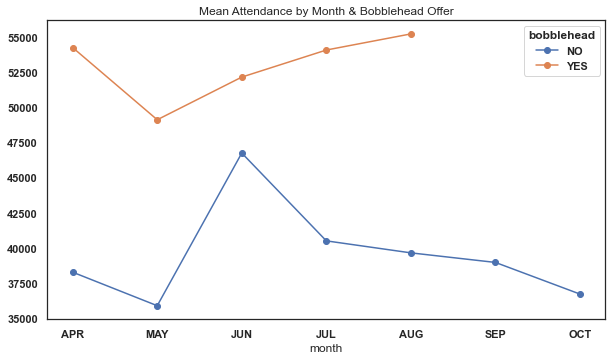

In [508]:
new_df = df.groupby(['month','bobblehead']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Month & Bobblehead Offer")
plt.show()

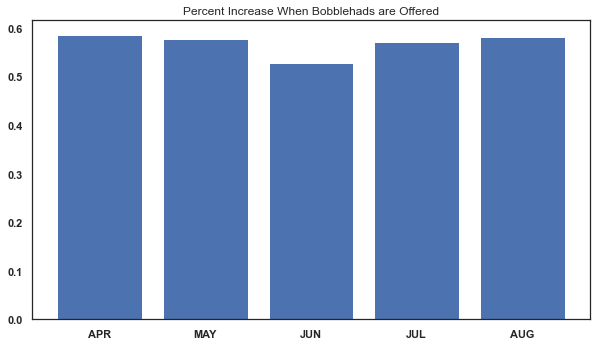

In [535]:
new_df = df.groupby(['month','bobblehead']).mean()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['month'], new_df['total'])
plt.title("Percent Increase When Bobblehads are Offered")
plt.show()

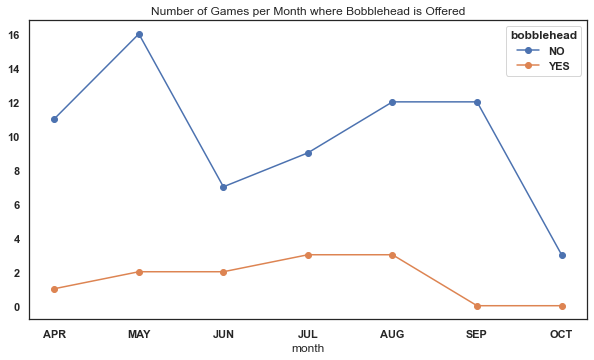

In [513]:
new_df = df.groupby(['month','bobblehead']).count()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Number of Games per Month where Bobblehead is Offered")
plt.show()

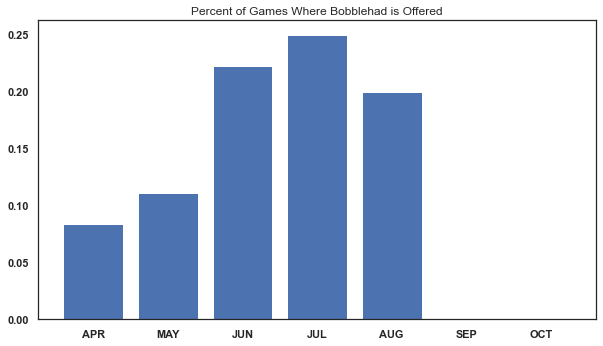

In [527]:
new_df = df.groupby(['month','bobblehead']).count()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['month'], new_df['total'])
plt.title("Percent of Games Where Bobblehad is Offered")
plt.show()

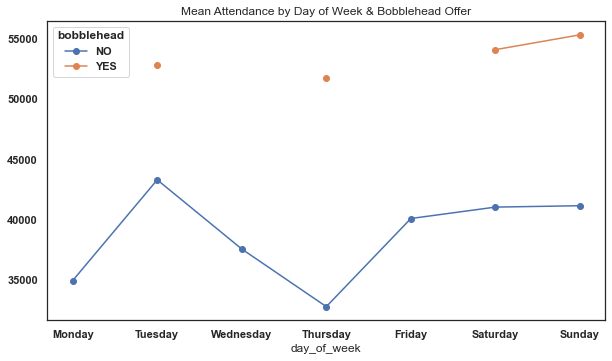

In [509]:
new_df = df.groupby(['day_of_week','bobblehead']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Day of Week & Bobblehead Offer")
plt.show()

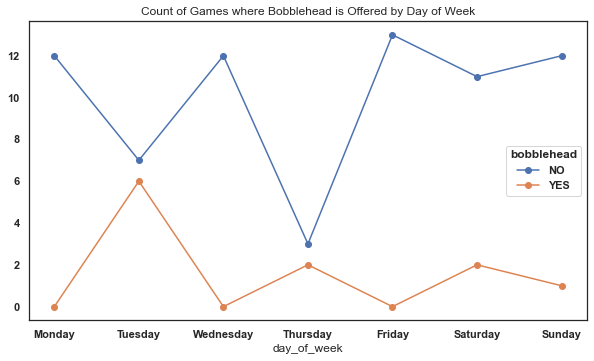

In [514]:
new_df = df.groupby(['day_of_week','bobblehead']).count()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Count of Games where Bobblehead is Offered by Day of Week")
plt.show()

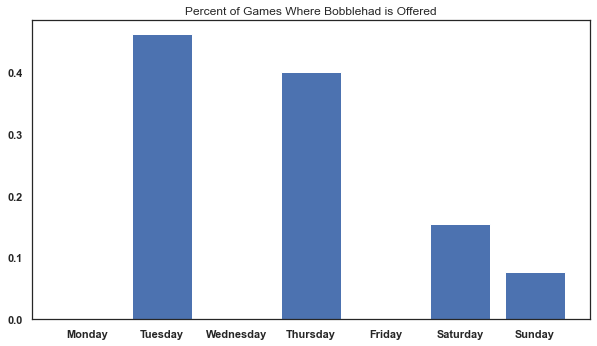

In [529]:
new_df = df.groupby(['day_of_week','bobblehead']).count()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['day_of_week'], new_df['total'])
plt.title("Percent of Games Where Bobblehad is Offered")
plt.show()

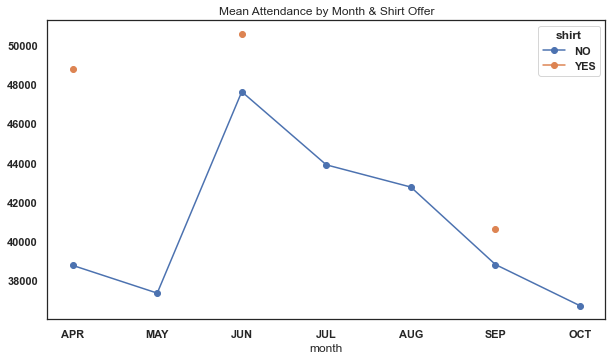

In [453]:
new_df = df.groupby(['month','shirt']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Month & Shirt Offer")
plt.show()

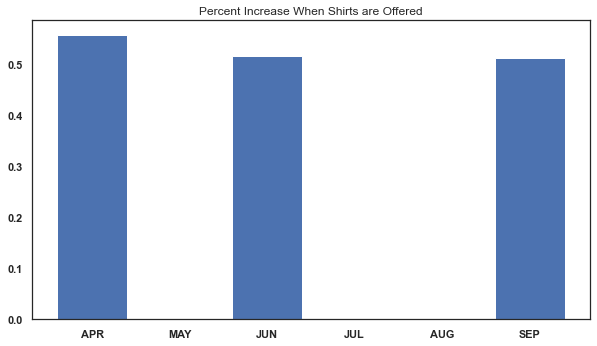

In [536]:
new_df = df.groupby(['month','shirt']).mean()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['month'], new_df['total'])
plt.title("Percent Increase When Shirts are Offered")
plt.show()

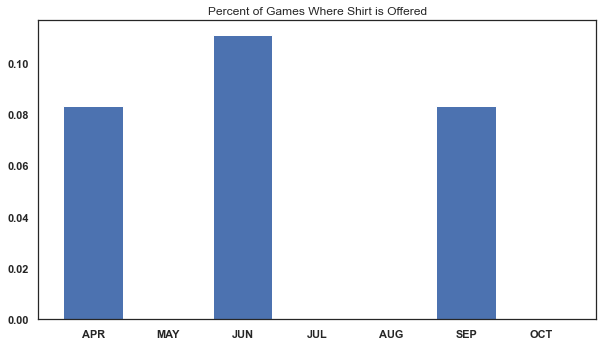

In [530]:
new_df = df.groupby(['month','shirt']).count()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['month'], new_df['total'])
plt.title("Percent of Games Where Shirt is Offered")
plt.show()

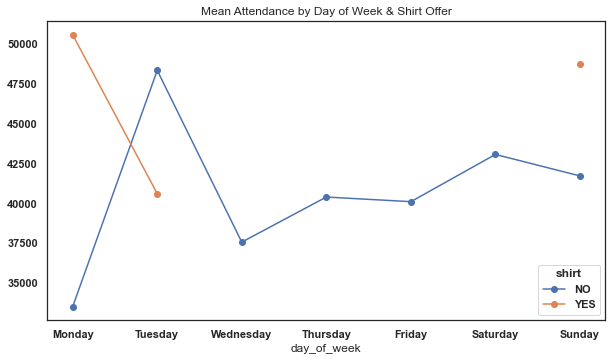

In [510]:
new_df = df.groupby(['day_of_week','shirt']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Day of Week & Shirt Offer")
plt.show()

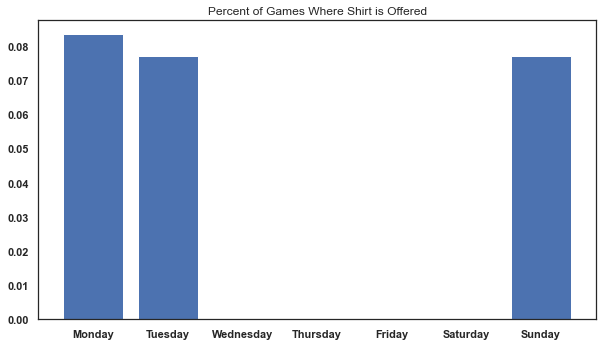

In [531]:
new_df = df.groupby(['day_of_week','shirt']).count()['attend']
new_df = new_df.unstack().reset_index()
new_df['total'] = (new_df['YES']) / (new_df['YES']+new_df['NO'])

plt.bar(new_df['day_of_week'], new_df['total'])
plt.title("Percent of Games Where Shirt is Offered")
plt.show()

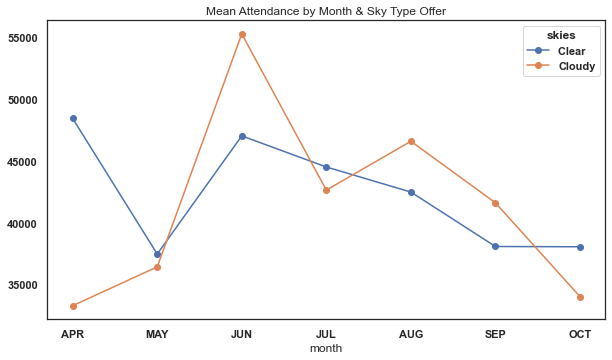

In [492]:
new_df = df.groupby(['month','skies']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Month & Sky Type Offer")
plt.show()

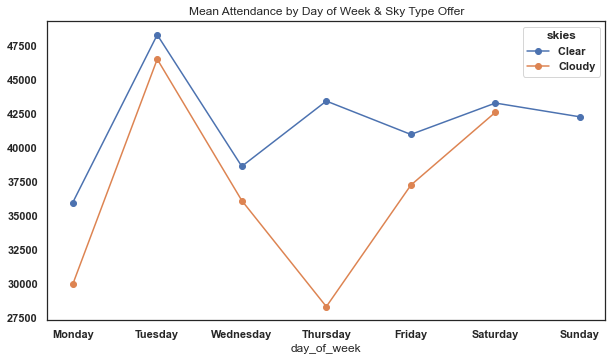

In [512]:
new_df = df.groupby(['day_of_week','skies']).mean()['attend']
new_df.unstack().plot(marker='o',)
plt.title("Mean Attendance by Day of Week & Sky Type Offer")
plt.show()

### Step 7: Investigate impact of Bobblehead offer, shirt offer, and sky type at daily level

#### Mean Attendance by if Bobble is Offered Chart Notes:
Monthly Mean Attendance is higher when bobble head is offered

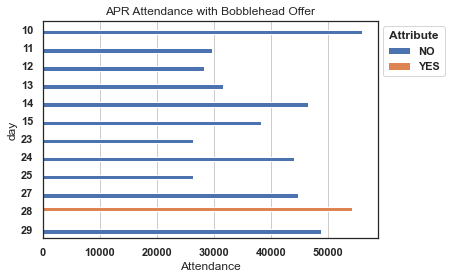

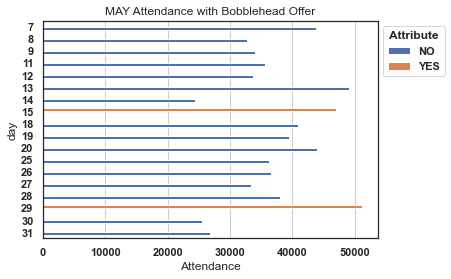

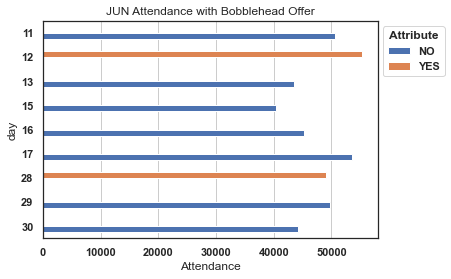

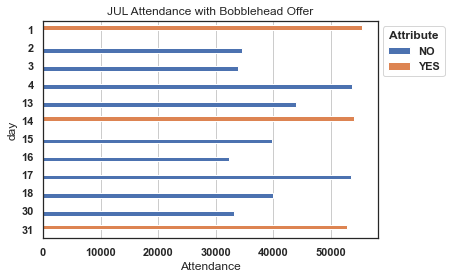

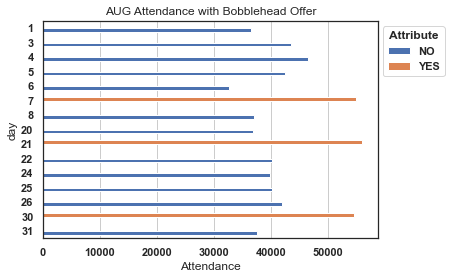

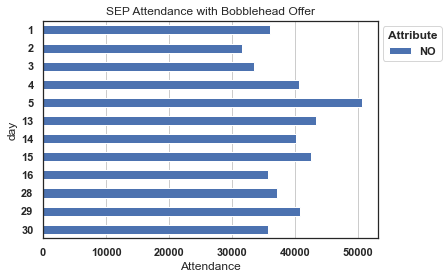

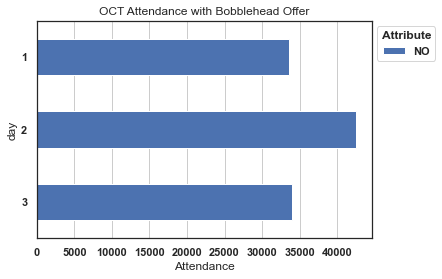

In [494]:
for i in df['month'].unique():

    df_month_agg = df.loc[df['month']==i]
    dfp = df_month_agg.pivot(index='day', columns='bobblehead', values='attend')
    dfp = dfp.sort_values(by='day', ascending=False)
    # plot
    ax = dfp.plot(kind='barh', title='Bar Chart of Colors', figsize=(6, 4))
    ax.set(xlabel='Attendance')
    ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
    ax.grid(axis='x')
    ax.set_title("{} Attendance with Bobblehead Offer".format(i))

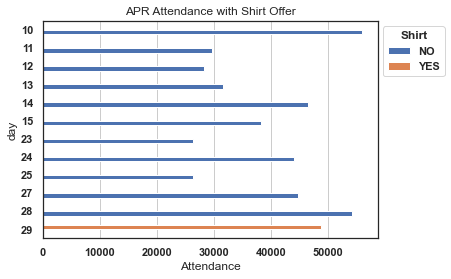

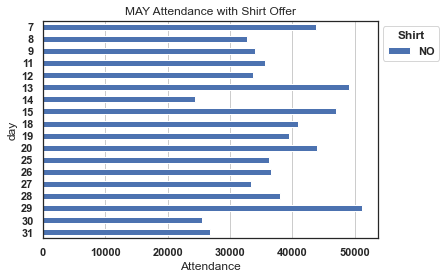

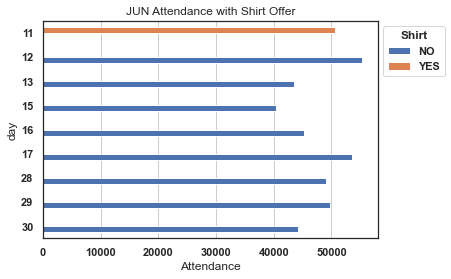

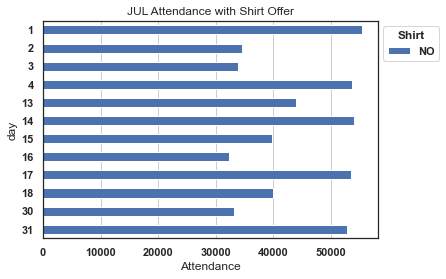

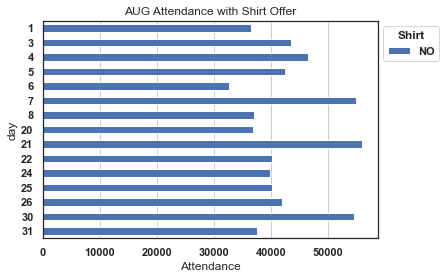

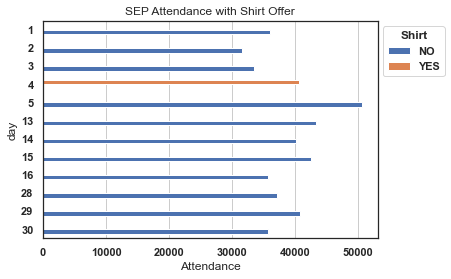

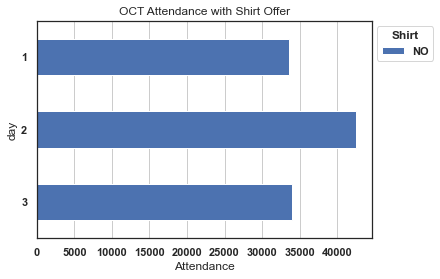

In [495]:
for i in df['month'].unique():

    df_month_agg = df.loc[df['month']==i]
    dfp = df_month_agg.pivot(index='day', columns='shirt', values='attend')
    dfp = dfp.sort_values(by='day', ascending=False)
    # plot
    ax = dfp.plot(kind='barh', title='Bar Chart of Colors', figsize=(6, 4))
    ax.set(xlabel='Attendance')
    ax.legend(title='Shirt', bbox_to_anchor=(1, 1), loc='upper left')
    ax.grid(axis='x')
    ax.set_title("{} Attendance with Shirt Offer".format(i))

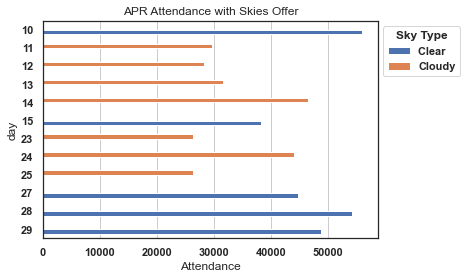

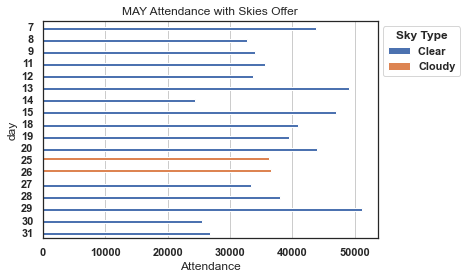

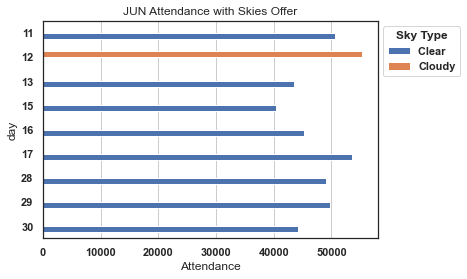

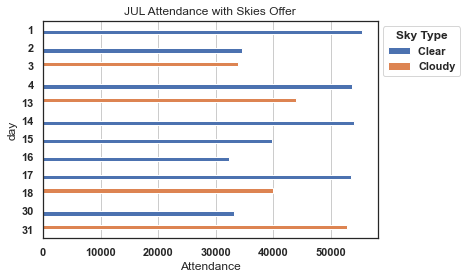

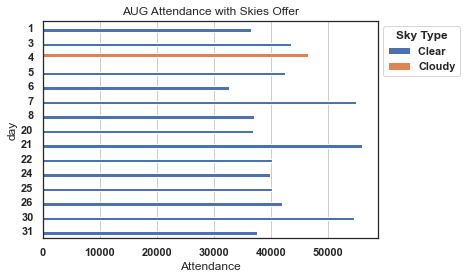

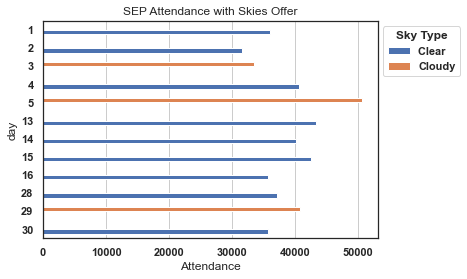

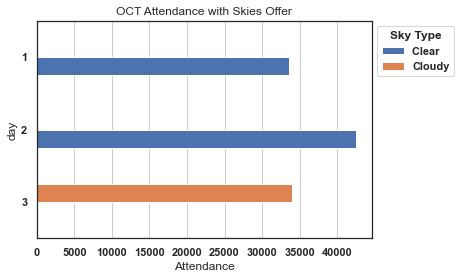

In [497]:
for i in df['month'].unique():

    df_month_agg = df.loc[df['month']==i]
    dfp = df_month_agg.pivot(index='day', columns='skies', values='attend')
    dfp = dfp.sort_values(by='day', ascending=False)
    # plot
    ax = dfp.plot(kind='barh', title='Bar Chart of Colors', figsize=(6, 4))
    ax.set(xlabel='Attendance')
    ax.legend(title='Sky Type', bbox_to_anchor=(1, 1), loc='upper left')
    ax.grid(axis='x')
    ax.set_title("{} Attendance with Skies Offer".format(i))

#### Conclusion



Bobbleheads and shirts being offered at games has a strong correlation with attendance numbers. The games where bobbleheads were offered tended to be the highest attended games for the month.

Bobbleheads were not offered in September and October and we have started to see a decline in attendance of games. 

When bobbleheads are offered, we can expect an increase in attendance of at least 50%.

We see this same pattern with offering shirts. When shirts are offered, game attendance for the month can expect around a 50% increase. Shirts were only offered for 3 games from April to October, but these days tended to be on the higer end of attendance days. 

I would propose that we increase the percentage of games where we offer bobbleheads . I would also like to increase the percentage of days where we offer shirts to better gauge their ability to impact attendance.

I would propose offering bobbleheads a minimum of 25% of the days of each month. We did this in June and July and saw our hihest mean attendance. I would also propose offering shirts 10% of all games to begin with to begin tracking performance.